<a href="https://colab.research.google.com/github/Rdisrael/progs-and-AI/blob/main/Bean_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier


For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

In [6]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
# Do not change this code
!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/train.zip \
    -O /tmp/train.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/validation.zip \
    -O /tmp/validation.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/test.zip \
    -O /tmp/test.zip
# Do not change this code
import os
import zipfile
#code to open a zip file, just coppy this code for every single IA code maybe that works
local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2024-01-05 04:39:30--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>] 137.15M  35.2MB/s    in 3.9s    

2024-01-05 04:39:34 (35.2 MB/s) - ‘/tmp/train.zip’ saved [143812152/143812152]

--2024-01-05 04:39:35--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [a

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator #the generator rescales the image

train_datagen = ImageDataGenerator( #rescale of the training image, these images are RGB format so 1/255
      rescale=1./255
)

validation_datagen = ImageDataGenerator(
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' #do not use zip files here
VAL_DIRECTORY_LOCATION ='/tmp/validation'
TARGET_SIZE = (224,224) #number of pixels
CLASS_MODE = 'categorical' #

train_generator = train_datagen.flow_from_directory(#taking the data from the folders
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Model

In [3]:
model = tf.keras.models.Sequential([ # here i will use the data values of CNN cifar 10
   tf.keras.layers.InputLayer((224,224,3)), #input layer of 224x224 pixels and imagens with 3 RGB channels
   tf.keras.layers.Conv2D(16, (3,3), activation='relu'), #first layer of convolution
   tf.keras.layers.MaxPooling2D(2,2),#max pooling reduces the image size
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),#flatten to linearize
   tf.keras.layers.Dense(512, activation='relu'),#512 neuros in the dense hidden layer
   tf.keras.layers.Dense(3, activation='softmax'), #3 is the output number that you want
])
model.summary() #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [4]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

In [5]:
NUM_EPOCHS = 20 #i think 20 epochs was enuff but is good to try with more epochs

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/20
9/9 [==============================] - 16s 711ms/step - loss: 1.2552 - accuracy: 0.3549 - val_loss: 1.0540 - val_accuracy: 0.5188
Epoch 2/20
9/9 [==============================] - 5s 530ms/step - loss: 0.9416 - accuracy: 0.5774 - val_loss: 0.9464 - val_accuracy: 0.5940
Epoch 3/20
9/9 [==============================] - 6s 620ms/step - loss: 0.7959 - accuracy: 0.6451 - val_loss: 0.7913 - val_accuracy: 0.6316
Epoch 4/20
9/9 [==============================] - 5s 550ms/step - loss: 0.7500 - accuracy: 0.6470 - val_loss: 0.6724 - val_accuracy: 0.7068
Epoch 5/20
9/9 [==============================] - 6s 658ms/step - loss: 0.6871 - accuracy: 0.7021 - val_loss: 0.7029 - val_accuracy: 0.6541
Epoch 6/20
9/9 [==============================] - 6s 604ms/step - loss: 0.6034 - accuracy: 0.7263 - val_loss: 0.7077 - val_accuracy: 0.7293
Epoch 7/20
9/9 [==============================] - 5s 532ms/step - loss: 0.7669 - accuracy: 0.6886 - val_loss: 0.7060 - val_accuracy: 0.6767
Epoch 8/20
9/9 [===

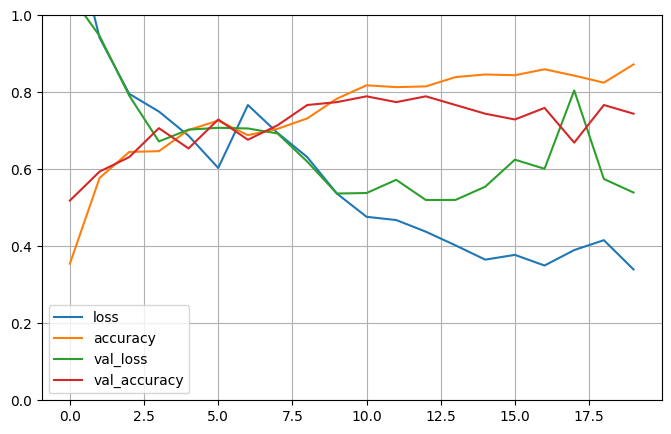

In [6]:
#function to compare the loss and acurracy
def loss_grap(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
loss_grap(history)


With more train images

In [8]:
train_datagen = ImageDataGenerator( #rescale of the training image, these images are RGB format so 1/255
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' #do not use zip files here
VAL_DIRECTORY_LOCATION ='/tmp/validation'
TARGET_SIZE = (224,224) #number of pixels
CLASS_MODE = 'categorical' #

train_generator = train_datagen.flow_from_directory(#taking the data from the folders
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


In [10]:
model2 = tf.keras.models.Sequential([ # here i will use the data values of CNN cifar 10
   tf.keras.layers.InputLayer((224,224,3)), #input layer of 224x224 pixels and imagens with 3 RGB channels
   tf.keras.layers.Conv2D(16, (3,3), activation='relu'), #first layer of convolution
   tf.keras.layers.MaxPooling2D(2,2),#max pooling reduces the image size
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),#flatten to linearize
   tf.keras.layers.Dense(512, activation='relu'),#512 neuros in the dense hidden layer
   tf.keras.layers.Dense(3, activation='softmax'), #3 is the output number that you want
])
model2.summary() #summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 64)       

In [11]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model2.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

In [12]:
NUM_EPOCHS = 20 #i think 20 epochs was enuff but is good to try with more epochs

history2 = model2.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/20
9/9 [==============================] - 27s 2s/step - loss: 1.2285 - accuracy: 0.3327 - val_loss: 1.0893 - val_accuracy: 0.4812
Epoch 2/20
9/9 [==============================] - 18s 2s/step - loss: 1.0686 - accuracy: 0.4130 - val_loss: 1.0288 - val_accuracy: 0.5113
Epoch 3/20
9/9 [==============================] - 19s 2s/step - loss: 1.0568 - accuracy: 0.4758 - val_loss: 1.0055 - val_accuracy: 0.4511
Epoch 4/20
9/9 [==============================] - 18s 2s/step - loss: 0.9940 - accuracy: 0.4681 - val_loss: 0.9149 - val_accuracy: 0.5564
Epoch 5/20
9/9 [==============================] - 18s 2s/step - loss: 0.8829 - accuracy: 0.5667 - val_loss: 0.8363 - val_accuracy: 0.5789
Epoch 6/20
9/9 [==============================] - 18s 2s/step - loss: 0.9931 - accuracy: 0.5300 - val_loss: 0.8194 - val_accuracy: 0.6241
Epoch 7/20
9/9 [==============================] - 19s 2s/step - loss: 0.9402 - accuracy: 0.5213 - val_loss: 0.8976 - val_accuracy: 0.5865
Epoch 8/20
9/9 [==================

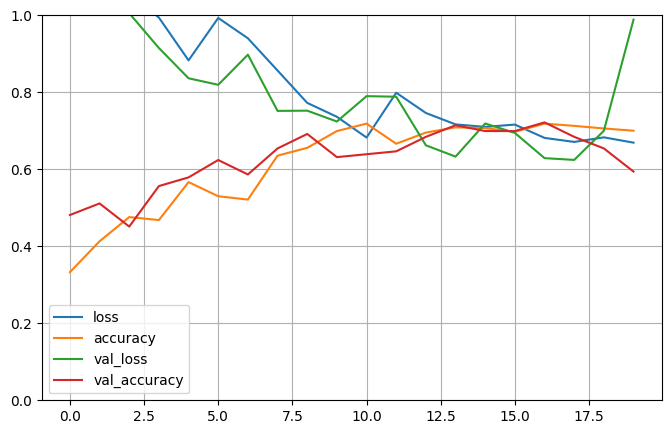

In [13]:
#function to compare the loss and acurracy
def loss_grap(history2):
    pd.DataFrame(history2.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
loss_grap(history2)